In [1]:
from truthnet import truthnet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv('data/gibbonsglobal.csv',index_col=0).astype(str).replace('-9','')
df.drop('Dx',axis=1).to_csv('data/global.csv',index=None)

In [3]:
Tr=truthnet()
## load data and infer qnet
features,samples = Tr.load_data(datapath="data/global.csv")
Tr.fit(fit=False,modelpath="results/global.joblib")
Tr.getDissonance(outfile="mpi_tmp/global_dissonance.csv",processes=11)

In [4]:
suspects,usamples=Tr.getSuspects(alpha=.01,mode='uniform',return_samples=True)
suspects.join(pd.read_csv("data/global.csv"))

,mean_dissonance,2,3,5,6,7,8,9,10,11,...,4592,4593,4594,4596,4631,4632,4634,4635,4636,4637


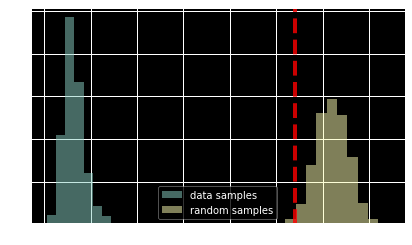

In [5]:
plt.figure()
plt.style.use('dark_background')
dissonance = pd.DataFrame(data=Tr.dissonance.mean(axis=1), columns=["Qnet"])
dissonance["random"] = Tr.urandom_dissonance_df.mean(axis=1)
plt.hist(dissonance["Qnet"], alpha=0.5, label="data samples")
plt.hist(dissonance["random"], alpha=0.5, label="random samples")
plt.legend()
plt.axvline(Tr.cithreshold[('suspect',0.01)][0], color="red", linestyle="--", alpha=.8)

In [6]:
Tr.cithreshold

{('suspect', 0.01): (0.26990111552258234, 0.35077483084761685)}

In [7]:
usamples

,2,3,5,6,7,8,9,10,11,12,...,4590,4591,4592,4593,4594,4596,4631,4632,4634,4635
0,1,1,2,,,2,2,1,1,2,...,2,1,1,1,3,,1,1,1,1
1,1,1,,1,2,,1,,1,1,...,,,1,1,,1,1,1,5,3
2,1,2,2,2,1,,2,,,1,...,5,,4,2,5,,,1,1,2
3,,2,,2,2,1,,1,2,,...,5,,4,3,3,3,4,3,5,5
4,,2,1,,2,2,,,2,,...,5,4,,5,2,2,2,,4,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,,,1,2,,,1,2,2,1,...,3,4,2,2,3,,3,1,5,3
1232,,2,1,1,,,1,1,1,2,...,,4,1,3,2,5,2,,5,
1233,2,1,1,1,1,,1,2,2,1,...,2,4,3,3,3,3,3,,3,3
1234,,1,,,2,,,2,1,,...,3,,5,2,3,,3,,1,5
